In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Corona_NLP_train.csv", encoding="latin-1", parse_dates=["TweetAt"])

In [3]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df.shape

(41157, 6)

In [5]:
df.iloc[0]["OriginalTweet"]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

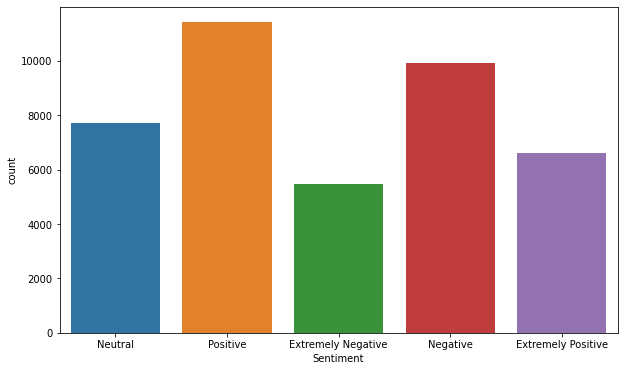

In [6]:
f, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df, x="Sentiment")

In [7]:
df = df.drop(columns=["UserName", "ScreenName"])

In [8]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment
0,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Location       32567 non-null  object        
 1   TweetAt        41157 non-null  datetime64[ns]
 2   OriginalTweet  41157 non-null  object        
 3   Sentiment      41157 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.3+ MB


In [10]:
df.isna().sum()

Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [12]:
df["Location"] = LabelEncoder().fit_transform(df["Location"])
df["Sentiment"] = LabelEncoder().fit_transform(df["Sentiment"])
df["TweetAt"] = LabelEncoder().fit_transform(df["TweetAt"])

In [13]:
imputer = SimpleImputer(strategy="most_frequent")
df["Location"] = imputer.fit_transform([df["Location"]])[0]

In [14]:
df.isna().sum()

Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [15]:
df.head()

,Location,TweetAt,OriginalTweet,Sentiment
0,5690,3,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3
1,10282,3,advice Talk to your neighbours family to excha...,4
2,10551,3,Coronavirus Australia: Woolworths to give elde...,4
3,12220,3,My food stock is not the only one which is emp...,4
4,12220,3,"Me, ready to go at supermarket during the #COV...",0


<AxesSubplot:>

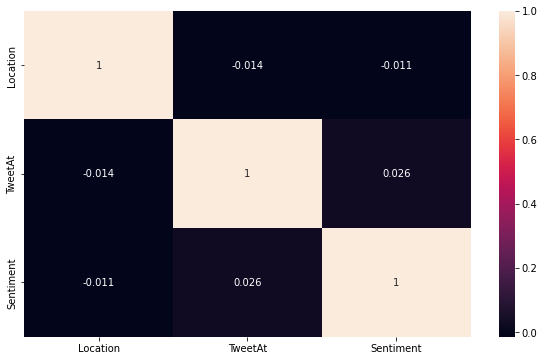

In [16]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr, annot=True)

In [17]:
df = df.drop(columns="Location")

In [18]:
df.head()

,TweetAt,OriginalTweet,Sentiment
0,3,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3
1,3,advice Talk to your neighbours family to excha...,4
2,3,Coronavirus Australia: Woolworths to give elde...,4
3,3,My food stock is not the only one which is emp...,4
4,3,"Me, ready to go at supermarket during the #COV...",0
